In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# let James know if you run into permissions errors
# TODO: replace matplotlib.animation with napari
plt.rcParams['animation.ffmpeg_path'] = '/global/home/users/jpduncan/.conda/envs/neurohub/bin/ffmpeg'

from os.path import join as oj
from skimage.io import imread, imshow

data_dir = '/clusterfs/fiona/yugroup/exllsm'
m3 = 'm3_Sample4/slice-tiff'

# Processed tiffs: cleaned, rotated, spectrally mixed (ch0 (0-32767) and ch2 (32768-65535): YFP and Homer1), compressed; voxel size (x, y, z): 114.38, 97.0, 155.23 nm
m4 = 'm4_Sample7/processed slice-tiff/MouseSomatoSpectralMixed_LinearYFP_cHomer_SM_v4'

# Mouse 3

In [3]:
# load the three channels of the first frame
m3_t0_ch0 = imread(oj(data_dir, m3, 'ch0', '0.tif'))
m3_t0_ch1 = imread(oj(data_dir, m3, 'ch1', '0.tif'))
m3_t0_ch2 = imread(oj(data_dir, m3, 'ch2', '0.tif'))

# combine the channels into one image
m3_t0 = np.dstack((m3_t0_ch0, m3_t0_ch1, m3_t0_ch2))

m3_t0_q9999 = np.quantile(m3_t0, .9999)

In [21]:
np.unique(m3_t0)

array([    0,     1,     2, ..., 61424, 62015, 65253], dtype=uint16)

## Plot as one image

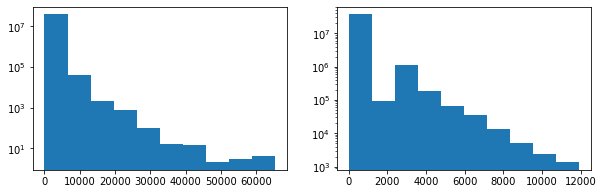

In [6]:
plt.figure(figsize=(10,3))

# show full distribution of pixel values
plt.subplot(121)
plt.hist(m3_t0.flatten())
plt.yscale('log')

# and truncated distribution
plt.subplot(122)
plt.hist(m3_t0[m3_t0 < m3_t0_q9999].flatten())
plt.yscale('log')

plt.show()

In [15]:
# assume large values can be safely truncated
m3_t0_ceil = np.amax(m3_t0[m3_t0 < m3_t0_q9999])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


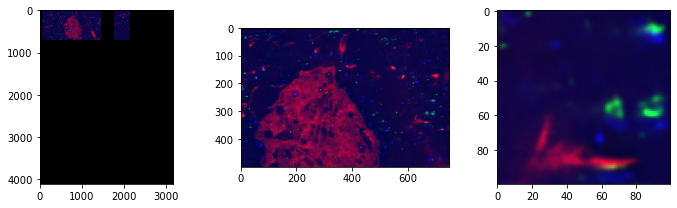

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))

# plot full frame
ax[0].imshow(m3_t0 / m3_t0_ceil, vmin=0, vmax=1)
# plot some detail
ax[1].imshow(m3_t0[:500, 500:1250] / m3_t0_ceil, vmin=0, vmax=1)
# plot more detail
ax[2].imshow(m3_t0[:500, 500:1250][250:350, 600:700] / m3_t0_ceil, vmin=0, vmax=1)

fig.tight_layout()
plt.show()

## Look at the three channels separately

In [16]:
ch0_ceil = np.amax(m3_t0_ch0[m3_t0_ch0 < np.quantile(m3_t0_ch0, .999)])
ch1_ceil = np.amax(m3_t0_ch1[m3_t0_ch1 < np.quantile(m3_t0_ch1, .999)])
ch2_ceil = np.amax(m3_t0_ch2[m3_t0_ch2 < np.quantile(m3_t0_ch2, .999)])

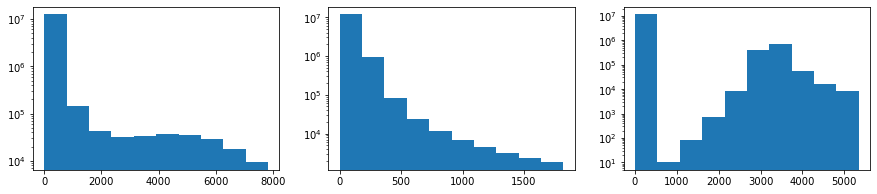

In [22]:
plt.figure(figsize=(15,3))

# show distribution of pixel values for each channel
plt.subplot(131)
plt.hist(m3_t0_ch0[m3_t0_ch0 < ch0_ceil].flatten())
plt.yscale('log')

plt.subplot(132)
plt.hist(m3_t0_ch1[m3_t0_ch1 < ch1_ceil].flatten())
plt.yscale('log')

plt.subplot(133)
plt.hist(m3_t0_ch2[m3_t0_ch2 < ch2_ceil].flatten())
plt.yscale('log')

plt.show()

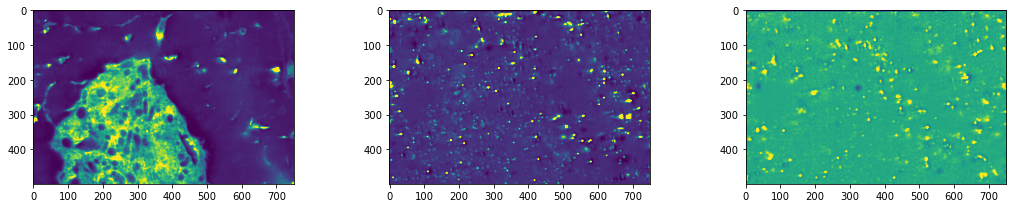

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))

# plot each channel separately
ax[0].imshow(m3_t0_ch0[:500, 500:1250] / ch0_ceil, vmin = 0, vmax = 1)
ax[1].imshow(m3_t0_ch1[:500, 500:1250] / ch1_ceil, vmin = 0, vmax = 1)
ax[2].imshow(m3_t0_ch2[:500, 500:1250] / ch2_ceil, vmin = 0, vmax = 1)

fig.tight_layout()
plt.show()

In [18]:
m3_ch0 = []

for i in range(100):
    m3_ch0.append(imread(oj(data_dir, m3, 'ch0', f'{i}.tif'))  / ch0_ceil)

m3_ch0 = np.dstack(m3_ch0)
    
fig, ax = plt.subplots()
l = ax.imshow(m3_ch0[:500,500:1250,0], vmin = 0, vmax = 1)

def animate(i):
    l.set_data(m3_ch0[:500,500:1250,i])

ani = FuncAnimation(fig, animate, frames=m3_ch0.shape[2])
plt.close()

from IPython.display import HTML
HTML(ani.to_html5_video())


In [19]:
m3_ch1 = []

for i in range(100):
    m3_ch1.append(imread(oj(data_dir, m3, 'ch1', f'{i}.tif'))  / ch1_ceil)

m3_ch1 = np.dstack(m3_ch1)
    
fig, ax = plt.subplots()
l = ax.imshow(m3_ch1[:500,500:1250,0], vmin = 0, vmax = 1)

def animate(i):
    l.set_data(m3_ch1[:500,500:1250,i])

ani = FuncAnimation(fig, animate, frames=m3_ch1.shape[2])
plt.close()

from IPython.display import HTML
HTML(ani.to_html5_video())


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs


In [20]:
%time
m3_ch2 = []

for i in range(100):
    m3_ch2.append(imread(oj(data_dir, m3, 'ch2', f'{i}.tif'))  / ch2_ceil)

m3_ch2 = np.dstack(m3_ch2)
    
fig, ax = plt.subplots()
l = ax.imshow(m3_ch2[:500,500:1250,0], vmin = 0, vmax = 1)

def animate(i):
    l.set_data(m3_ch2[:500,500:1250,i])

ani = FuncAnimation(fig, animate, frames=m3_ch2.shape[2])
plt.close()

from IPython.display import HTML
HTML(ani.to_html5_video())

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


# Mouse 4

In [7]:
m4_0650 = imread(oj(data_dir, m4, 'z0650_c0_t0.tif'))

m4_floor = np.amin(m4_0650[m4_0650 > 0])

m4_ceil0 = np.amax(m4_0650[m4_0650 < np.quantile(m4_0650, .99)])
m4_ceil1 = np.amax(m4_0650[m4_0650 < np.quantile(m4_0650, .995)])
m4_ceil2 = np.amax(m4_0650[m4_0650 < np.quantile(m4_0650, .999)])

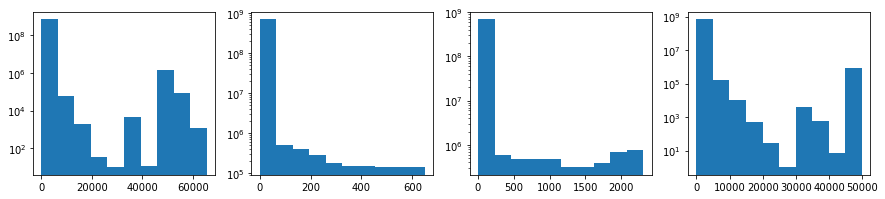

In [9]:
plt.figure(figsize=(15,3))

# show distribution of pixel values for each channel
plt.subplot(141)
plt.hist(m4_0650.flatten())
plt.yscale('log')

plt.subplot(142)
plt.hist(m4_0650[m4_0650 < m4_ceil0].flatten())
plt.yscale('log')

plt.subplot(143)
plt.hist(m4_0650[m4_0650 < m4_ceil1].flatten())
plt.yscale('log')

plt.subplot(144)
plt.hist(m4_0650[m4_0650 < m4_ceil2].flatten())
plt.yscale('log')

fig.tight_layout()
plt.show()

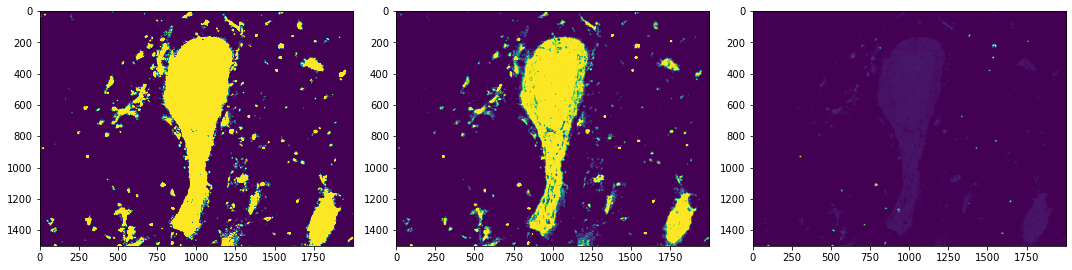

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))

# plot full frame
ax[0].imshow(m4_0650[30500:32000, 6000:8000], vmin=m4_floor, vmax=m4_ceil0)
# plot some detail
ax[1].imshow(m4_0650[30500:32000, 6000:8000], vmin=m4_floor, vmax=m4_ceil1)
# plot more detail
ax[2].imshow(m4_0650[30500:32000, 6000:8000], vmin=m4_floor, vmax=m4_ceil2)

fig.tight_layout()
plt.show()

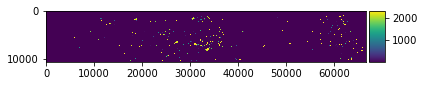

In [95]:
imshow(m4_0650.T, vmin=m4_floor, vmax=m4_ceil1)